In [1]:
! pip install ultralytics

from IPython import display
display.clear_output() # clears output cell

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.171 🚀 Python-3.11.4 torch-2.0.1 CPU (Apple M2 Pro)
Setup complete ✅ (10 CPUs, 16.0 GB RAM, 94.5/460.4 GB disk)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/Users/mateovelazquez/repos/school/cis-4951-algae-classificaiton-system


In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)

In [4]:
# create a train and val dataset
curr_path = HOME + '/old group/algae_dataset'
train_path = HOME + '/dataset/train'
val_path = HOME + '/dataset/val'

import shutil

def create_data_set():
    for folder in os.listdir(curr_path):
        # create folder in train and val
        os.mkdir(train_path + '/' + folder)
        os.mkdir(val_path + '/' + folder)

        # copy 80% of images to train and 20% to val
        num_images = len(os.listdir(curr_path + '/' + folder))
        num_train = int(num_images * 0.8)
        num_val = num_images - num_train

        for i in range(num_train):
            shutil.copy(curr_path + '/' + folder + '/' + os.listdir(curr_path + '/' + folder)[i], train_path + '/' + folder)
        for i in range(num_val):
            shutil.copy(curr_path + '/' + folder + '/' + os.listdir(curr_path + '/' + folder)[i + num_train], val_path + '/' + folder)


I used the above function to qiuckly create the dataset structure that yolo needed. A better method would be to make the different sets with random images from each class rather than just sequentially split them. Also could have used a testing set to test the final model on.

In [5]:
# Use the model
dataset = f'{HOME}/dataset'
results = model.train(data=dataset, epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set

New https://pypi.org/project/ultralytics/8.0.173 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.171 🚀 Python-3.11.4 torch-2.0.1 CPU (Apple M2 Pro)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/mateovelazquez/repos/school/cis-4951-algae-classificaiton-system/dataset, epochs=3, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_widt

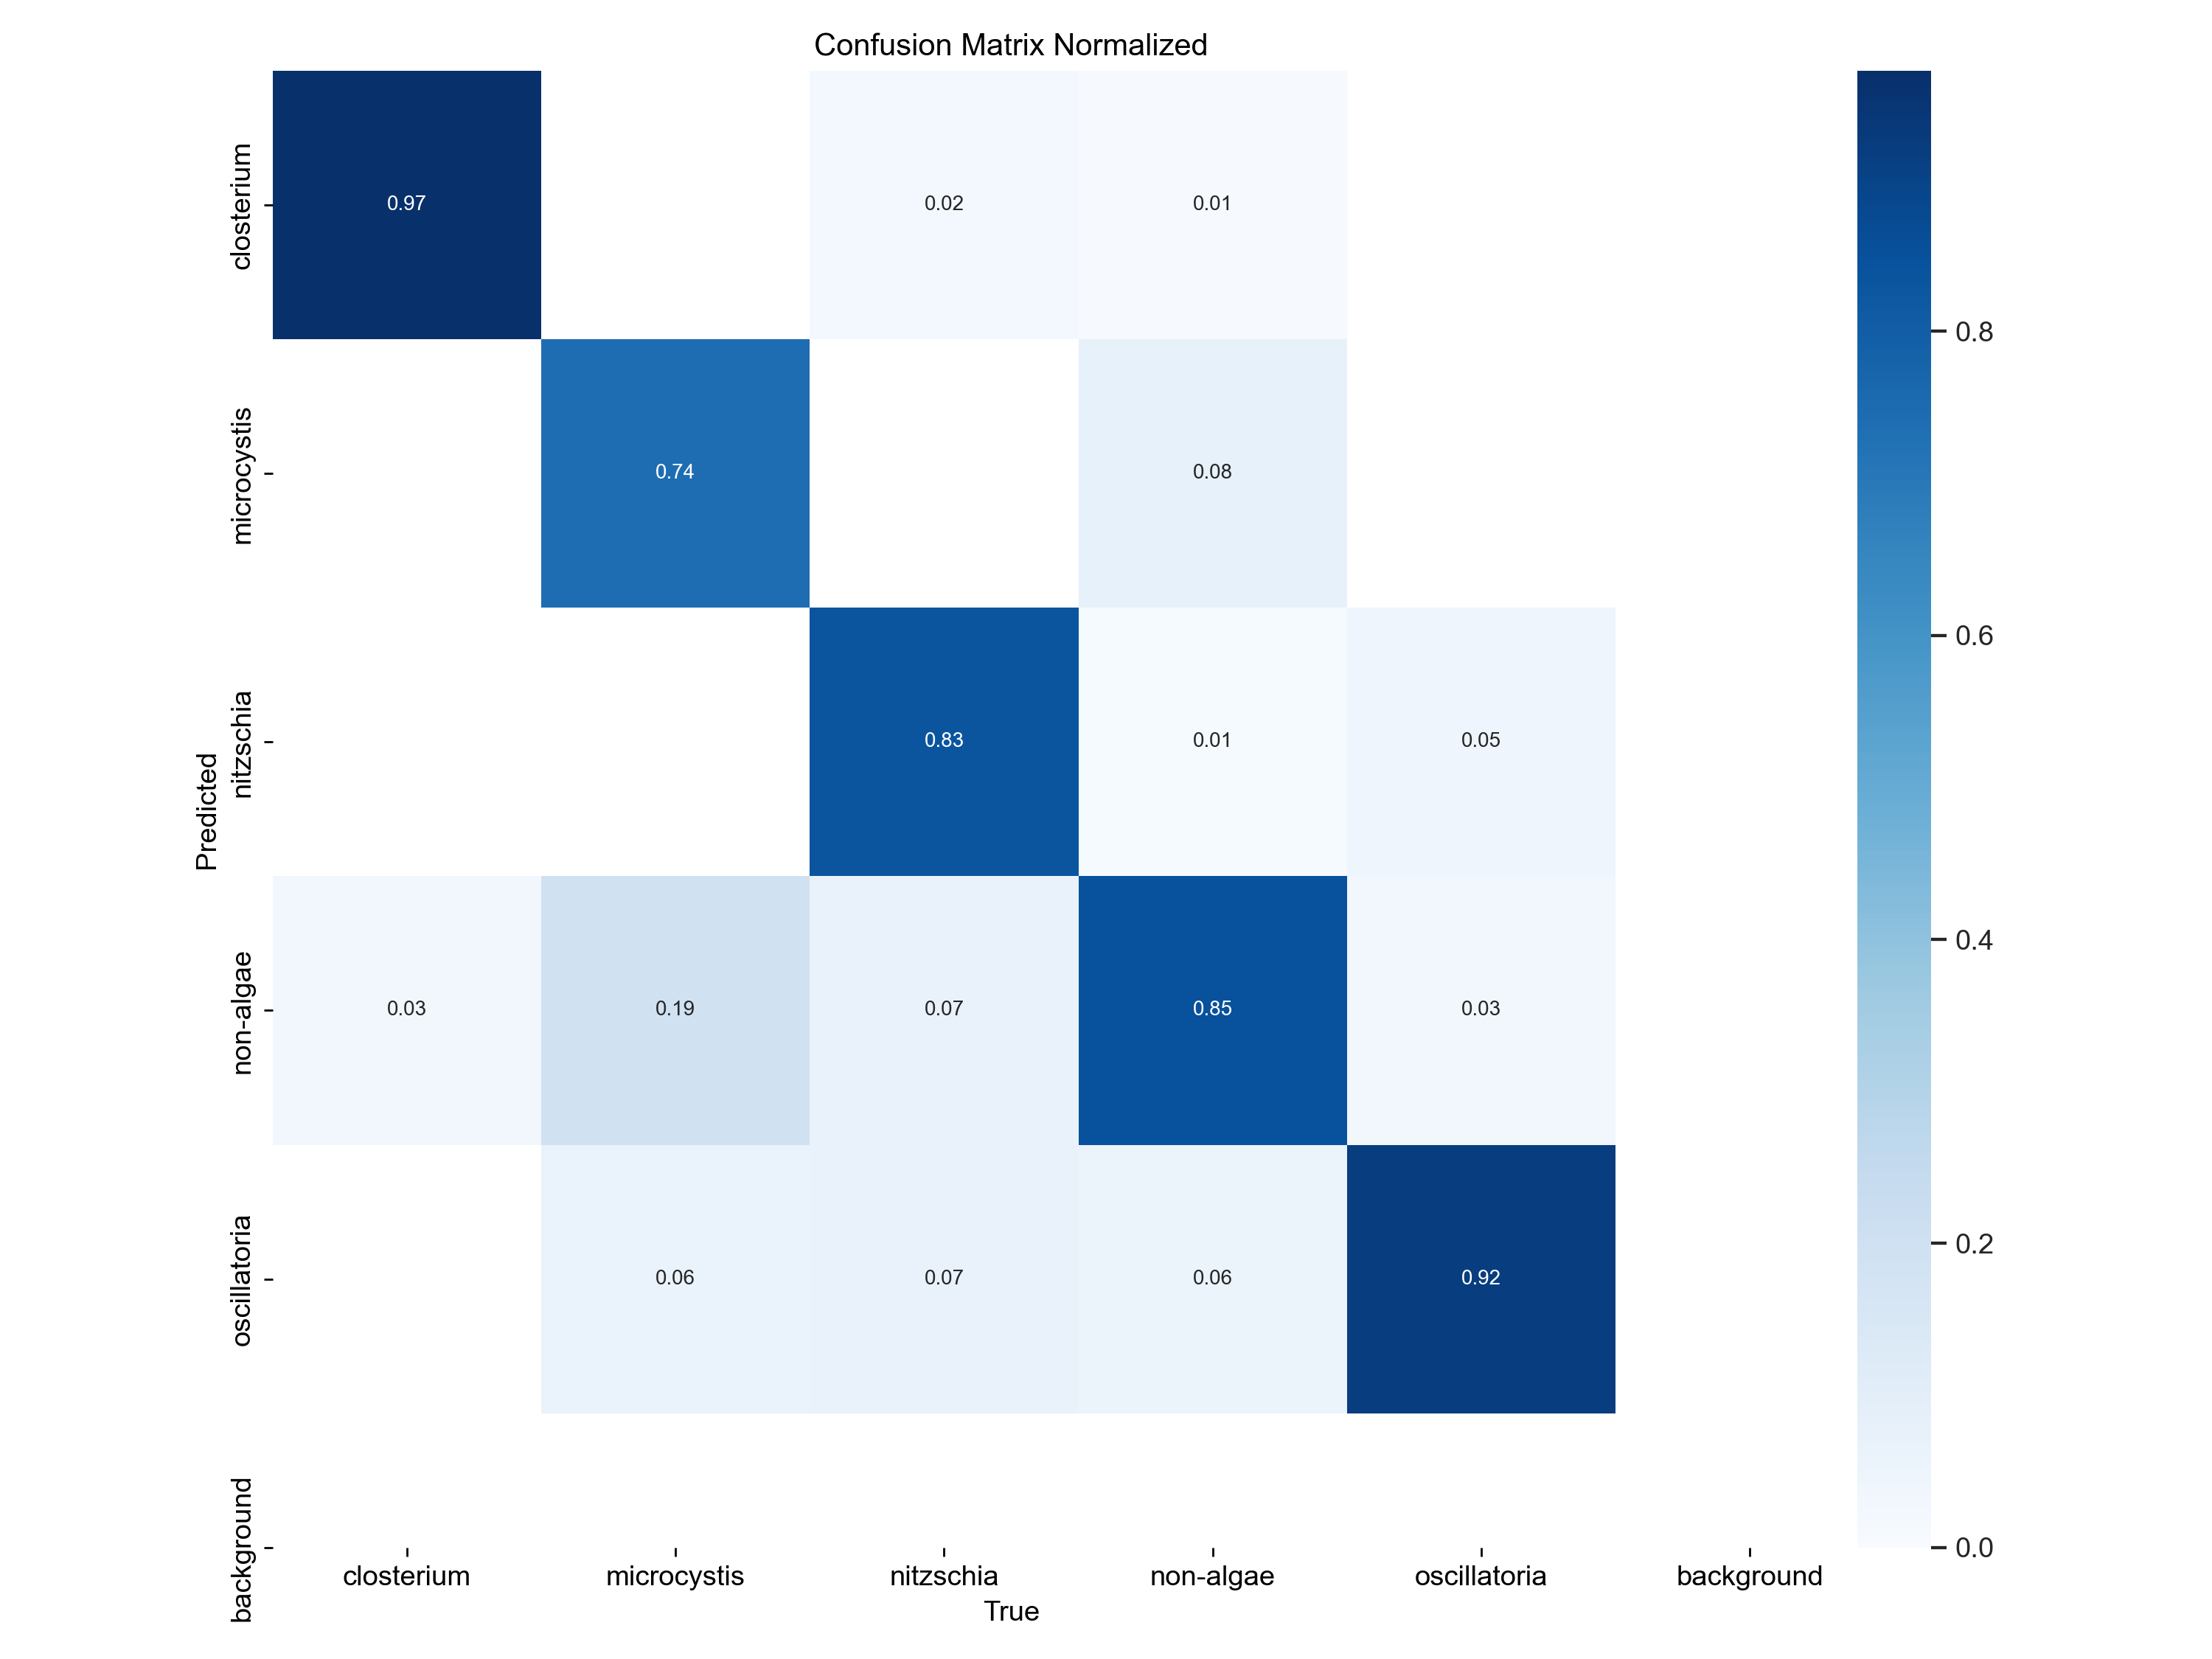